# Choques

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Choque Elastico

### Datos

In [27]:
# Masa 1

M1_11 = 237.827/1000
M2_11 = 231.298/1000

V1i_11 = (0.5419, 0.4998, 0.9186)
V1f_11 = (0.3349, 0.3737, 0.3570)
V2i_11 = (0.4850, 0.5929, 0.8183)
V2f_11 = (0.1306, 0.1680, 0.2212)

PE_i11 = [M1_11 * i + M2_11 * j for i, j in zip(V1i_11, V2i_11)]
PE_f11 = [M1_11 * i + M2_11 * j for i, j in zip(V1f_11, V2f_11)]

print(PE_i11)
print(PE_f11)

[0.24105798130000003, 0.2560025188, 0.4077390356]
[0.1098557811, 0.1277340139, 0.13606735660000002]


In [29]:
# Masa 2

M1_12 = 257.782/1000
M2_12 = 301.811/1000

V1i_12 = (0.5220, 0.4449, 0.6574)
V1f_12 = (0.5001, 0.4841, 0.3348)
V2i_12 = (0.5794, 0.4999, 0.5721)
V2f_12 = (0.2769, 0.2804, 0.1762)

PE_i12 = [M1_12 * i + M2_12 * j for i, j in zip(V1i_11, V2i_12)]
PE_f12 = [M1_12 * i + M2_12 * j for i, j in zip(V1f_11, V2f_12)]

print(PE_i12)
print(PE_f12)

[0.3145613592, 0.2797147625, 0.40946461829999997]
[0.16990265769999996, 0.18096093779999997, 0.14520727219999996]


In [31]:
# Masa 3

M1_13 = 307.525/1000
M2_13 = 402.299/1000

V1i_13 = (0.5460, 0.4212, 0.4014)
V1f_13 = (0.4919, 0.6289, 0.5411)
V2i_13 = (0.4718, 0.5943, 0.4733)
V2f_13 = (0.3189, 0.2685, 0.2627)

PE_i13 = [M1_13 * i + M2_13 * j for i, j in zip(V1i_13, V2i_13)]
PE_f13 = [M1_13 * i + M2_13 * j for i, j in zip(V1f_13, V2f_13)]

print(PE_i13)
print(PE_f13)

[0.35771331819999996, 0.3686158257, 0.3138486517]
[0.2795646986, 0.301419754, 0.2720857248]


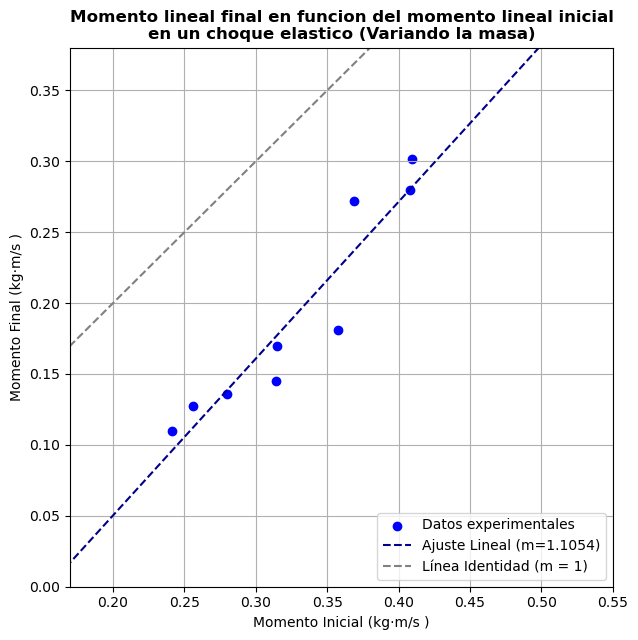

Momento inicial: ['0.24', '0.26', '0.28', '0.31', '0.31', '0.36', '0.37', '0.41', '0.41']
Momento final: ['0.11', '0.13', '0.14', '0.15', '0.17', '0.18', '0.27', '0.28', '0.30']
1.1054400462599663 -0.1707592049383858


In [47]:
PEi1 = PE_i11 + PE_i12 + PE_i13
PEi1.sort()
PEf1 = PE_f11 + PE_f12 + PE_f13
PEf1.sort()

PEi1 = np.array(PEi1)
PEf1 = np.array(PEf1)

# Calcular la línea de mejor ajuste (mínimos cuadrados)
A1 = np.vstack([PEi1, np.ones(len(PEi1))]).T
m1, c1 = np.linalg.lstsq(A1, PEf1, rcond=None)[0]

# Definir un rango de valores de PEi1
PEi1_range = np.linspace(0, 1, 100)

# Calcular los valores correspondientes de PEf1 para el rango definido
PEf1_range = m1 * PEi1_range + c1

# Crear la gráfica
plt.figure(figsize=(7, 7))
plt.scatter(PEi1, PEf1, color='b', label='Datos experimentales')
plt.plot(PEi1_range, PEf1_range, color='darkblue', linestyle='--', label='Ajuste Lineal (m=1.1054)')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Línea Identidad (m = 1)')  # Línea Identidad

# Añadir título y etiquetas
plt.title('Momento lineal final en funcion del momento lineal inicial\nen un choque elastico (Variando la masa)', fontweight='bold')
plt.xlabel('Momento Inicial (kg⋅m/s ‍)')
plt.ylabel('Momento Final (kg⋅m/s ‍)')
plt.legend()
plt.grid(True)
plt.xlim(0.17,0.55)
plt.ylim(0,0.38)

plt.show()

PEi1_formatted = [f"{value:.2f}" for value in PEi1]
PEf1_formatted = [f"{value:.2f}" for value in PEf1]

print('Momento inicial:', PEi1_formatted)
print('Momento final:', PEf1_formatted)

print(m1, c1)

## Choque Inelastico

In [10]:
# Masa 1

M1_21 = 237.063/1000
M2_11 = 242.948/1000

V1i_21 = (0.6819, 0.5343, 0.5050)
V2f_21 = (0.3156, 0.2573, 0.3541)

PI_i21 = []
PI_f21 = []

for i in range(3):
    Pinicial1 = M1_21 * V1i_21[i]
    Pfinal1 = (M1_21+M2_11) * V2f_21[i]
    PI_i21.append(Pinicial1)
    PI_f21.append(Pfinal1)

print(PI_i21)
print(PI_f21)

[0.1616532597, 0.1266627609, 0.119716815]
[0.15149147159999998, 0.12350683029999998, 0.1699718951]


In [11]:
# Masa 2

M1_22 = 257.023/1000
M2_22 = 302.701/1000

V1i_22 = (0.6415, 0.6975, 0.6975)
V2f_22 = (0.2715, 0.2850, 0.2828)

PI_i22 = []
PI_f22 = []

for i in range(3):
    Pinicial2 = M1_22 * V1i_22[i]
    Pfinal2 = (M1_22 + M2_22) * V2f_22[i] 
    PI_i22.append(Pinicial2)
    PI_f22.append(Pfinal2)

print(PI_i22)
print(PI_f22)

[0.1648802545, 0.1792735425, 0.1792735425]
[0.151965066, 0.15952133999999998, 0.1582899472]


In [12]:
# Masa 3

M1_23 = 306.762/1000
M2_23 = 403.191/1000

V1i_23 = (0.6825, 0.9424, 0.9370)
V2f_23 = (0.3351, 0.3912, 0.3921)

PI_i23 = []
PI_f23 = []

for i in range(3):
    Pinicial3 = M1_23 * V1i_23[i]
    Pfinal3 = (M1_23 + M2_23) * V2f_23[i]
    PI_i23.append(Pinicial3)
    PI_f23.append(Pfinal3)

print(PI_i23)
print(PI_f23)

[0.209365065, 0.2890925088, 0.287435994]
[0.23790525029999998, 0.2777336136, 0.2783725713]


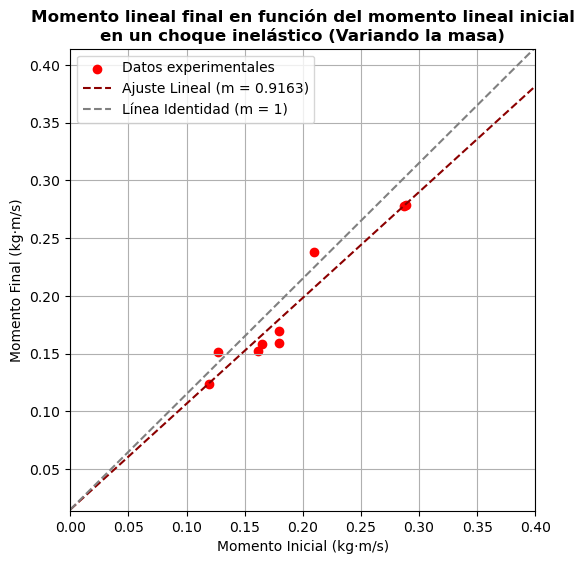

La pendiente de la línea de mejor ajuste es: m = 0.9163
Momento inicial: ['0.12', '0.13', '0.16', '0.16', '0.18', '0.18', '0.21', '0.29', '0.29']
Momento final: ['0.12', '0.15', '0.15', '0.16', '0.16', '0.17', '0.24', '0.28', '0.28']


In [43]:
PIi = PI_i21 + PI_i22 + PI_i23
PIi.sort()
PIf = PI_f21 + PI_f22 + PI_f23
PIf.sort()

PIi = np.array(PIi)
PIf = np.array(PIf)

# Calcular la línea de mejor ajuste (mínimos cuadrados)
A2 = np.vstack([PIi, np.ones(len(PIi))]).T
m2, c2 = np.linalg.lstsq(A2, PIf, rcond=None)[0]

# Definir los puntos para el ajuste lineal
x_values = np.linspace(0, 1, 100)
y_values = m2 * x_values + c2

# Crear la gráfica
plt.figure(figsize=(6, 6))
plt.scatter(PIi, PIf, color='red', label='Datos experimentales')
plt.plot(x_values, y_values, color='darkred', linestyle='--', label=f'Ajuste Lineal (m = {m2:.4f})')
plt.plot([0,1], [0+0.015,1+0.015], color='gray', linestyle='--', label='Línea Identidad (m = 1)') 

# Añadir título y etiquetas
plt.title('Momento lineal final en función del momento lineal inicial\nen un choque inelástico (Variando la masa)', fontweight='bold')
plt.xlabel('Momento Inicial (kg⋅m/s)')
plt.ylabel('Momento Final (kg⋅m/s)')
plt.legend()
plt.grid(True)

# Establecer límites de los ejes
plt.xlim(0, 0.4)
plt.ylim(0.014, 0.414)

plt.show()

# Mostrar la pendiente del ajuste lineal
print(f"La pendiente de la línea de mejor ajuste es: m = {m2:.4f}")

PIi_formatted = [f"{value:.2f}" for value in PIi]
PIf_formatted = [f"{value:.2f}" for value in PIf]

print('Momento inicial:', PIi_formatted)
print('Momento final:', PIf_formatted)

In [14]:
c2

0.01501068252941034